
Análise Exploratória dos Dados do Titanic (EDA)
# ==================================================

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')

In [8]:
df.head()  # visualiza as 5 primeiras linhas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
df.shape     # deve retornar numero de linhas x colunas   

(1309, 14)

In [10]:
df.columns     # lista os nomes das colunas

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [11]:
df.info()   # mostra tipo de dados e contagem não-nula por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [12]:
df.describe()  # estatísticas descritivas para colunas numéricas

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Imputação de Dados Faltantes
# ==================================================

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.isnull().sum() # Verifica valores ausentes

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
from sklearn.impute import KNNImputer

cols_to_impute = ['age', 'fare']
df_impute = df[cols_to_impute].copy()

imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_impute)
df[cols_to_impute] = df_imputed_array

In [16]:
df.drop('name', axis=1, inplace=True)

In [17]:
# Para cada coluna categórica
cat_cols = ['embarked', 'cabin', 'boat', 'home.dest', 'body']

for col in cat_cols:
    moda = df[col].mode()[0]
    df[col].fillna(moda, inplace=True)


df['cabin'].fillna('Unknown', inplace=True)
df['boat'].fillna('None', inplace=True)
df['home.dest'].fillna('Unknown', inplace=True)
df['body'].fillna('Unknown', inplace=True)

from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['embarked']] = cat_imputer.fit_transform(df[['embarked']])

In [18]:
df.isnull().sum() # Verifica valores ausentes apos a imputação

pclass       0
survived     0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

Análise Univariada e relações simples
# ==================================================

In [19]:
df['survived'].mean()
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

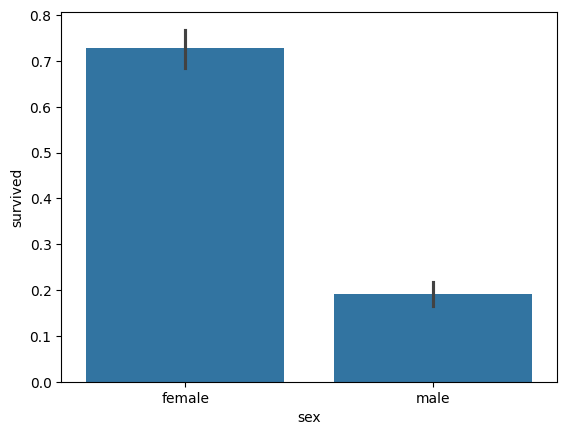

In [20]:
import seaborn as sns
sns.barplot(x='sex', y='survived', data=df)

In [21]:
df.groupby('pclass')['survived'].mean() # média de sobrevivência por classe

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Modelagem Preditiva (Machine Learning) com scikit-learn
# ==================================================

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   object 
 9   embarked   1309 non-null   object 
 10  boat       1309 non-null   object 
 11  body       1309 non-null   float64
 12  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [27]:
import pandas as pd
from pycaret.classification import ClassificationExperiment

ModuleNotFoundError: No module named 'pycaret.classification'

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/Users/vitorsainvallio/projetos/titanic/titanic-survival-analysis/.venv/lib/python3.9/site-packages/sklearn/utils/__init__.py)